In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [5]:
data1 = pd.read_csv('/content/calories.csv')
data2 = pd.read_csv('/content/exercise.csv')

In [7]:
data1

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [8]:
data2

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [9]:
data2['calories_burnt'] = data1['Calories']

In [10]:
data2

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,calories_burnt
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [13]:
data2.replace({"Gender" : {'male' : 1 , "female" : 0}} , inplace = True)

In [14]:
X = data2.drop(columns = 'calories_burnt' , axis = 1)
Y = data2['calories_burnt']

In [16]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.1 , random_state = 1)
model = XGBRegressor()
model.fit(X_train , Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
x_prediction = model.predict(X_train)
r2_train = r2_score(Y_train , x_prediction)
print(r2_train)

x_prediction_test = model.predict(X_test)
r2_test = r2_score(Y_test , x_prediction_test)
print(r2_test)

0.999590741487574
0.9985620211390679


In [21]:
input = (11179863, 1,	69,	179.0,	79.0,	5.0,	88.0,	38.7	)
input = np.asarray(input).reshape(1,-1)
prediction = model.predict(input)
print("The Calories Burnt is " , prediction)

The Calories Burnt is  [27.227095]


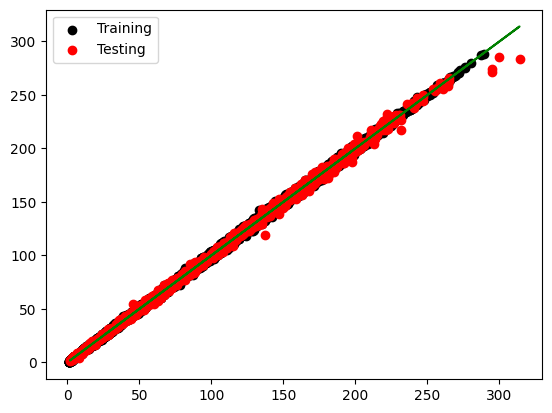

In [25]:
import matplotlib.pyplot as plt
plt.scatter(Y_train , x_prediction , color = "Black" , label = "Training")
plt.scatter(Y_test , x_prediction_test , color = "Red" , label = "Testing")
plt.plot(Y_test,Y_test,color ="green")
plt.legend()
plt.show()
